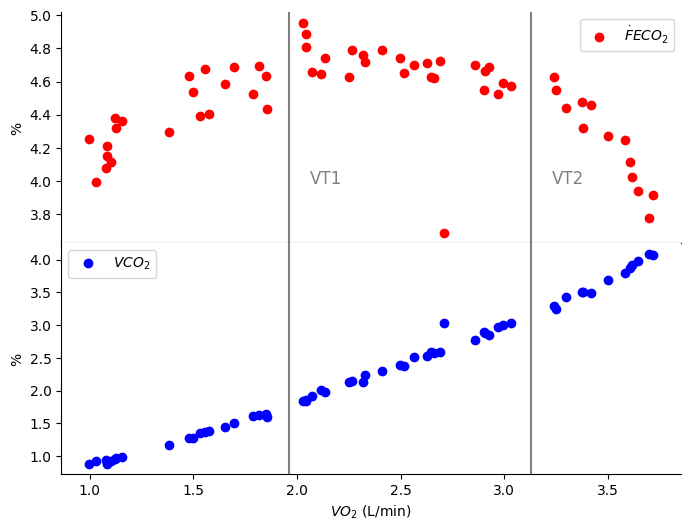

In [3]:
### Now all together in one code block that could run independently...
# lets take care of importing everything we need at once

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Lets read in our file now
df = pd.read_csv('/kaggle/input/subject-1432/subject_1432.csv', header=[0], skiprows=[1,2,3])

# please note that while this is an output file from the parvo-metabolics cart we have
# I have edited this data set and simplied the header file on it

# rename our column headers
df = df.rename(columns={'VE/': 'VE/VO2','VE/.1': 'VE/VCO2'})

# simplify our terms to reduce future typing... 
# it is easier to write plot x, y than plot df['Time'], df['VO2']
x = df['VO2']
y = df['FECO2']
y1 = df['VCO2']

#Find VO2 max value 
ymax = max(y)

# find the x position of the ymax value or where ymax occurs on the x axis
xmax = x[y.argmax()]

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6)) 

# this line seperates the two plots...
fig.subplots_adjust(hspace=0)

# annotate the position of V02 max before plotting the value, we could do this later but why.

ax[0].plot(x, y, 'o', label=('$\dot FECO_2$'), c='r' )
# in the line of code below I hide the top and right black bars serrounding the plot for APA format.
ax[0].spines[['right', 'top']].set_visible(False)
ax[0].set(ylabel=('%'))
ax[0].legend()
#note all these set features could be added in one line but reading it would be difficult

VT1 = 1.96  
ax[0].axvline(x=VT1, color='grey', linestyle='-', label='Vertical Line at x=5')
ax[1].axvline(x=VT1, color='grey', linestyle='-')  
ax[0].text(VT1 + 0.1, ax[0].get_ylim()[1] * 0.8, 'VT1', color='grey', fontsize=12, va='center')

VT2 =  3.13 
ax[0].axvline(x=VT2, color='grey', linestyle='-', label='Vertical Line at x=5')
ax[1].axvline(x=VT2, color='grey', linestyle='-')  
ax[0].text(VT2 + 0.1, ax[0].get_ylim()[1] * 0.8, 'VT2', color='grey', fontsize=12, va='center')



# Second plot of values down from the top
ax[1].plot(x, y1, 'o', label=('$VCO_2$'), c='b')
ax[1].spines[['top', 'right']].set_visible(False)
ax[1].set(ylabel=('%'))
ax[1].set(xlabel=('$VO_2$ (L/min)'))
ax[1].legend()



# save the figure before we show it... or it will be blank
fig.savefig("VO2-VE-4.png", dpi=300, bbox_inches = "tight")
fig.show()